In [1]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_center_dataset(filename):
    x = np.load(filename)
    x=x-np.mean(x, axis=0) 
    return x



In [3]:
def get_covariance(dataset):
    a=(np.dot(np.transpose(x), x)/(len(dataset)-1))
    return a 


In [4]:
def get_eig(S, m):
    a=eigh(S,eigvals=(len(S)-m,len(S)-1))
    fa=np.flip(a[0])
    fb=np.flip(a[1],1)
    return np.diag(fa),fb


In [5]:
def get_eig_perc(S, perc):
    value,vector=eigh(S)
    Lamda=value/np.sum(value)
    get_value=value[Lamda>perc]
    return get_eig(S,len(get_value))

In [6]:
def project_image(image, U):
    alpha=np.dot(np.transpose(U), image)
    total=np.dot(U,alpha)
    return total



In [7]:
def display_image(orig, proj):
    orig=orig.reshape(32, 32,order='F')
    proj=proj.reshape(32, 32,order='F')
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].set_title('Original')
    axs[1].set_title('Projection')
    im1=axs[0].imshow(orig,aspect='equal')
    im2=axs[1].imshow(proj,aspect='equal')
    fig.colorbar(im1, ax=axs[0])
    fig.colorbar(im2, ax=axs[1])
    return plt.show()



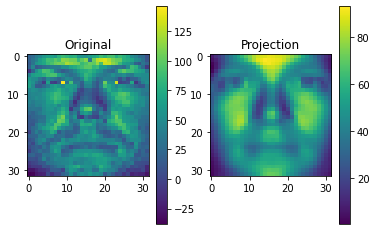

In [8]:
x = load_and_center_dataset('YaleB_32x32.npy')
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
projection = project_image(x[0], U)
display_image(x[0], projection)

In [9]:
S

array([[ 4489.89086662,  4389.34792897,  3995.10495964, ...,
        -1746.30867941, -1717.96935269, -1747.38102573],
       [ 4389.34792897,  4494.33226746,  4121.91863906, ...,
        -1806.20485557, -1776.84081736, -1794.5663578 ],
       [ 3995.10495964,  4121.91863906,  4165.45776399, ...,
        -1715.27680755, -1671.3253095 , -1691.55397407],
       ...,
       [-1746.30867941, -1806.20485557, -1715.27680755, ...,
         3756.33920877,  3586.66741082,  3219.28148259],
       [-1717.96935269, -1776.84081736, -1671.3253095 , ...,
         3586.66741082,  3596.68436881,  3292.45606665],
       [-1747.38102573, -1794.5663578 , -1691.55397407, ...,
         3219.28148259,  3292.45606665,  3497.1660824 ]])